In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

In [130]:
c = 3e8
lim = 30e-9
grid_size = 1000
x0=np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij')
v=0.9*c
tmax=6e-8
print(tmax)
n_frame=1000000
dt=tmax/(n_frame)

import math

omeg=2*math.pi/1e-16
print(omeg)
charge = pc.OscillatingCharge(origin=(0, 0, 0), direction=(1, 0, 0), amplitude=2e-9, omega=6.28e+16)
simulation = pc.Simulation(charge)

6e-08
6.2831853071795864e+16


In [131]:
i=4
print(charge.xpos(t=i*math.pi/(2*omeg)))
print(charge.xvel(t=i*math.pi/(2*omeg)))
print(charge.xacc(t=i*math.pi/(2*omeg)))

1.9999898538267507e-09
400073.90521813167
-7.887639985116092e+24


t= 1.2e-12


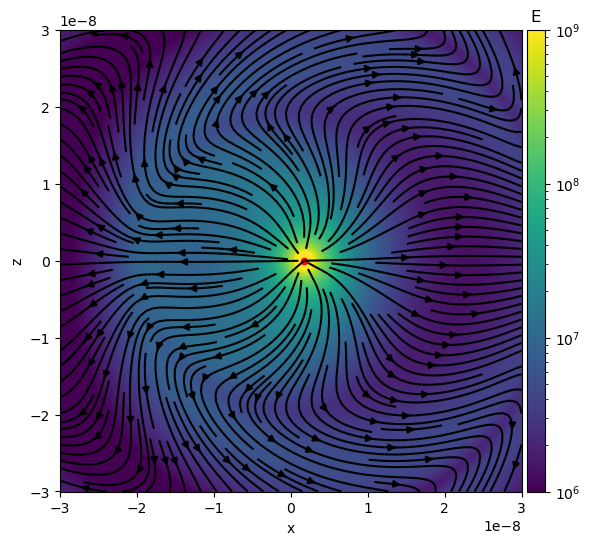

In [132]:
i=20
t=i*dt
print("t=",t)
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e6
vmax=1e9
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    # step=40
    # Q = ax.quiver(x0[::step], x0[::step],
    #               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
    #print(type(charge.xpos(np.array(t))))
pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.show()

In [135]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
for i in range(0,60):
    t=i*dt
    print(t)
    E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
    Ex = E_total[0][:, 0, :]
    Ey = E_total[1][:, 0, :]
    Ez = E_total[2][:, 0, :]
    Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)
    fig=plt.figure(figsize=(7,6))
    ax=fig.add_subplot(111)
    vmin=1e6
    vmax=1e9
    im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
    stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("z")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('E')
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

0.0
6e-14
1.2e-13
1.8e-13
2.4e-13
3e-13
3.6e-13
4.2e-13
4.8e-13
5.399999999999999e-13
6e-13
6.6e-13
7.2e-13
7.799999999999999e-13
8.4e-13
9e-13
9.6e-13
1.0199999999999999e-12
1.0799999999999998e-12
1.14e-12
1.2e-12
1.2599999999999999e-12
1.32e-12
1.38e-12
1.44e-12
1.4999999999999999e-12
1.5599999999999998e-12
1.62e-12
1.68e-12
1.7399999999999999e-12
1.8e-12
1.8599999999999997e-12
1.92e-12
1.98e-12
2.0399999999999998e-12
2.1e-12
2.1599999999999997e-12
2.22e-12
2.28e-12
2.3399999999999997e-12
2.4e-12
2.46e-12
2.5199999999999998e-12
2.58e-12
2.64e-12
2.7e-12
2.76e-12
2.8199999999999997e-12
2.88e-12
2.94e-12
2.9999999999999997e-12
3.06e-12
3.1199999999999996e-12
3.1799999999999998e-12
3.24e-12
3.2999999999999997e-12
3.36e-12
3.42e-12
3.4799999999999997e-12
3.54e-12


In [134]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p OC.mp4
!rm plot/slice*

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disabl